In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
import Recommenders as Recommenders
import Evaluation as Evaluation

C:\Users\PRITHVIRAJ\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\PRITHVIRAJ\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\PRITHVIRAJ\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
movie_df_1 = pd.read_csv('ratings.csv')
movie_df_1.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [6]:
len(movie_df_1)

100004

In [7]:
movie_df = movie_df_1
movie_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [8]:
len(movie_df)

100004

In [9]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
userId       100004 non-null int64
movieId      100004 non-null int64
rating       100004 non-null float64
timestamp    100004 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [10]:
movie_df = movie_df.head(10000)

In [11]:
len(movie_df)

10000

In [15]:
movie_grouped = movie_df.groupby(['movieId']).agg({'rating' : 'count'}).reset_index()

In [16]:
grouped_sum = movie_grouped['rating'].sum()

In [17]:
print(grouped_sum)

10000


In [20]:
movie_grouped['percentage'] = movie_grouped['rating'].div(grouped_sum)*100

In [22]:
movie_grouped.sort_values(['rating', 'movieId'], ascending = [0,1])

,movieId,rating,percentage
220,356,33,0.33
182,296,32,0.32
160,260,30,0.30
193,318,28,0.28
315,527,27,0.27
346,593,27,0.27
74,110,25,0.25
288,480,25,0.25
587,1196,25,0.25
273,457,24,0.24


In [24]:
users = movie_df['userId'].unique()
len(users)

70

In [25]:
movies = movie_df['movieId'].unique()
len(movies)

3622

In [26]:
train_data, test_data = train_test_split(movie_df, test_size = 0.2, random_state = 0)

In [28]:
pm = Recommenders.popularity_recommender_py()

In [29]:
pm.create(train_data, 'userId', 'movieId')

In [30]:
user_id = users[20]

In [31]:
pm.recommend(user_id)

,userId,movieId,score,Rank
208,21,356,28,1.0
172,21,296,27,2.0
297,21,527,25,3.0
150,21,260,24,4.0
271,21,480,23,5.0
327,21,593,23,6.0
72,21,110,22,7.0
258,21,457,22,8.0
1123,21,2571,21,9.0
183,21,318,20,10.0


In [32]:
user_id = users[7]

In [33]:
pm.recommend(user_id)

,userId,movieId,score,Rank
208,8,356,28,1.0
172,8,296,27,2.0
297,8,527,25,3.0
150,8,260,24,4.0
271,8,480,23,5.0
327,8,593,23,6.0
72,8,110,22,7.0
258,8,457,22,8.0
1123,8,2571,21,9.0
183,8,318,20,10.0


In [34]:
is_model = Recommenders.item_similarity_recommender_py()


In [35]:
is_model.create(train_data, 'userId', 'movieId')

In [36]:
user_id = users[5]

In [37]:
user_items = is_model.get_user_items(user_id)

In [39]:
print('--------------------------------------------------------')
print("Training data movies for the user userId: %s:" %user_id)
print('--------------------------------------------------------')


--------------------------------------------------------
Training data movies for the user userId: 6:
--------------------------------------------------------


In [41]:
for user_item in user_items:
    print(user_item)
    
print('--------------------------------------------------------')
print("Recommendation process is going on:" )
print('--------------------------------------------------------')

#Recommend movies for the user using personalized model
is_model.recommend(user_id)

3751
1639
1285
2761
903
2529
1687
2072
2571
2502
1747
3300
158
1204
2890
173
3052
7090
2174
2001
596
4641
3114
2528
2692
1876
1259
1250
8784
4975
2723
8874
7361
8636
2019
--------------------------------------------------------
Recommendation process is going on:
--------------------------------------------------------
No. of unique songs for the user: 35
no. of unique songs in the training set: 3215
Non zero values in cooccurence_matrix :51060


,userId,movieId,score,rank
0,6.0,4370.0,0.217317,1.0
1,6.0,5445.0,0.217297,2.0
2,6.0,2011.0,0.202060,3.0
3,6.0,5464.0,0.199766,4.0
4,6.0,1266.0,0.196773,5.0
5,6.0,3504.0,0.194175,6.0
6,6.0,2115.0,0.192329,7.0
7,6.0,32587.0,0.191537,8.0
8,6.0,5679.0,0.190797,9.0
9,6.0,5989.0,0.189695,10.0


In [42]:
is_model.get_similar_items([2324])

no. of unique songs in the training set: 3215
Non zero values in cooccurence_matrix :1856


,userId,movieId,score,rank
0,,4973,0.545455,1
1,,55247,0.500000,2
2,,8784,0.444444,3
3,,926,0.428571,4
4,,6953,0.428571,5
5,,5952,0.428571,6
6,,46578,0.428571,7
7,,51540,0.428571,8
8,,8807,0.428571,9
9,,67734,0.428571,10


In [46]:
user_sample = 0.05

In [43]:
pr = Evaluation.precision_recall_calculator(test_data, train_data, pm, is_model)

In [47]:
(pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list) = pr.calculate_measures(user_sample)

Length of user_test_and_training:69
Length of user sample:3
Getting recommendations for user:51
No. of unique songs for the user: 24
no. of unique songs in the training set: 3215
Non zero values in cooccurence_matrix :26590
Getting recommendations for user:55
No. of unique songs for the user: 24
no. of unique songs in the training set: 3215
Non zero values in cooccurence_matrix :29372
Getting recommendations for user:6
No. of unique songs for the user: 35
no. of unique songs in the training set: 3215
Non zero values in cooccurence_matrix :51060


In [51]:
import pylab as pl

def plot_precision_recall(m1_precision_list, m1_recall_list, ml_label, m2_precision_list, m2_recall_list, m2_label):
    pl.clf()
    pl.plot(m1_recall_list, m1_precision_list, label = ml_label)
    pl.plot(m2_recall_list, m2_precision_list, label = m2_label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 0.2])
    pl.xlim([0.0, 0.2])
    pl.title('Precision-recall curve')
    #pl.legend(loc = 'upper right')
    pl.legend(loc = 9, bbox_to_anchor = (0.5, -0.2))
    pl.show()

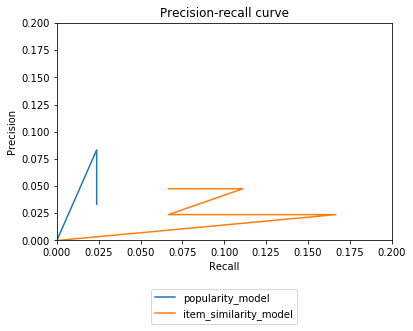

In [52]:
plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model",
                      ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")